In [1]:
# Import the libraries
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format ='retina'
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## Import data

In [ ]:
topStared=pd.read_csv('../../data(too large)/TopStaredRepositories.csv', sep=",")

## Data Info

In [3]:
topStared.head(3)

,Username,Repository Name,Description,Last Update Date,Language,Number of Stars,Tags,Url
0,freeCodeCamp,freeCodeCamp,The https://freeCodeCamp.com open source codeb...,2017-06-24T15:56:17Z,JavaScript,290k,"nonprofits,certification,curriculum,react,node...",https://github.com/freeCodeCamp/freeCodeCamp
1,twbs,bootstrap,"The most popular HTML, CSS, and JavaScript fra...",2017-06-24T15:40:21Z,JavaScript,112k,"javascript,css,html,bootstrap,jekyll-site,scss",https://github.com/twbs/bootstrap
2,EbookFoundation,free-programming-books,Freely available programming books,2017-06-23T01:09:34Z,NaN,87.8k,"education,list,books,resource",https://github.com/EbookFoundation/free-progra...


In [4]:
topStared.shape


(980, 8)

In [5]:
topStared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Username          980 non-null    object
 1   Repository Name   980 non-null    object
 2   Description       977 non-null    object
 3   Last Update Date  980 non-null    object
 4   Language          877 non-null    object
 5   Number of Stars   980 non-null    object
 6   Tags              489 non-null    object
 7   Url               980 non-null    object
dtypes: object(8)
memory usage: 61.4+ KB


In [6]:
topStared.isnull().sum()

Username              0
Repository Name       0
Description           3
Last Update Date      0
Language            103
Number of Stars       0
Tags                491
Url                   0
dtype: int64

###  Unique data

In [7]:
#'Commits Unique values
unique_value_counts = topStared.nunique()
print(unique_value_counts)

Username            814
Repository Name     973
Description         972
Last Update Date    978
Language             39
Number of Stars     215
Tags                486
Url                 979
dtype: int64


## Data Cleaning 

In [8]:
# Convert 'Last Update Date' to datetime
topStared['Last Update Date'] = pd.to_datetime(topStared['Last Update Date'])
# Convert 'Number of Stars' to numeric
topStared['Number of Stars'] = topStared['Number of Stars'].replace('k', '', regex=True).astype(float) * 1000

# EDA

## topStared

In [9]:
topStared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   Username          980 non-null    object             
 1   Repository Name   980 non-null    object             
 2   Description       977 non-null    object             
 3   Last Update Date  980 non-null    datetime64[ns, UTC]
 4   Language          877 non-null    object             
 5   Number of Stars   980 non-null    float64            
 6   Tags              489 non-null    object             
 7   Url               980 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), object(6)
memory usage: 61.4+ KB


In [10]:
top_message = topStared['Username'].value_counts().head(10)
top_message

Username
facebook        20
google          20
angular          7
Microsoft        5
sindresorhus     5
airbnb           5
thoughtbot       4
hashicorp        4
ReactiveX        4
square           4
Name: count, dtype: int64

In [11]:
#'Commits Unique values
unique_value_counts = topStared.nunique()
print(unique_value_counts)

Username            814
Repository Name     973
Description         972
Last Update Date    978
Language             39
Number of Stars     215
Tags                486
Url                 979
dtype: int64


In [12]:
print("\nSummary Statistics:")
topStared.describe()


Summary Statistics:


,Number of Stars
count,980.000000
mean,12985.714286
std,12780.091770
min,6400.000000
25%,7700.000000
50%,9500.000000
75%,14200.000000
max,290000.000000


<Axes: xlabel='Language', ylabel='count'>

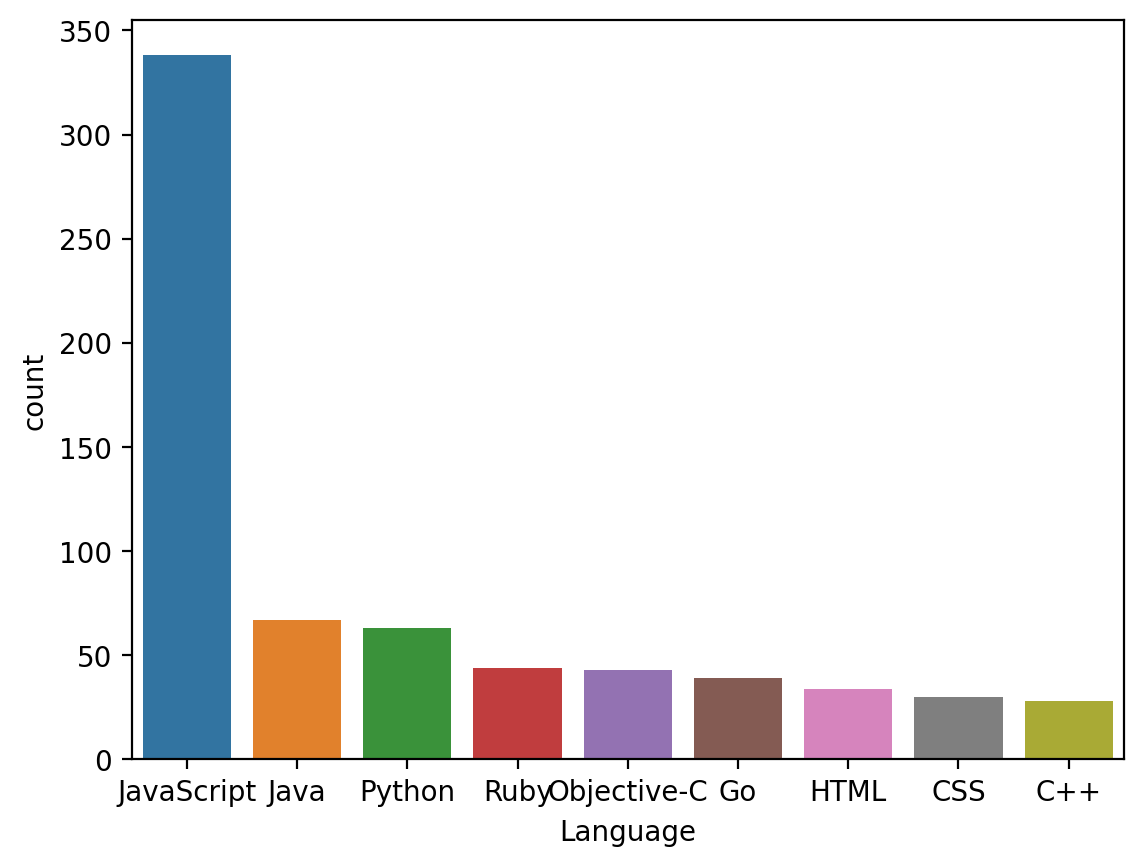

In [13]:
sns.countplot(x='Language',data=topStared,order=pd.value_counts(topStared['Language']).iloc[:9].index)

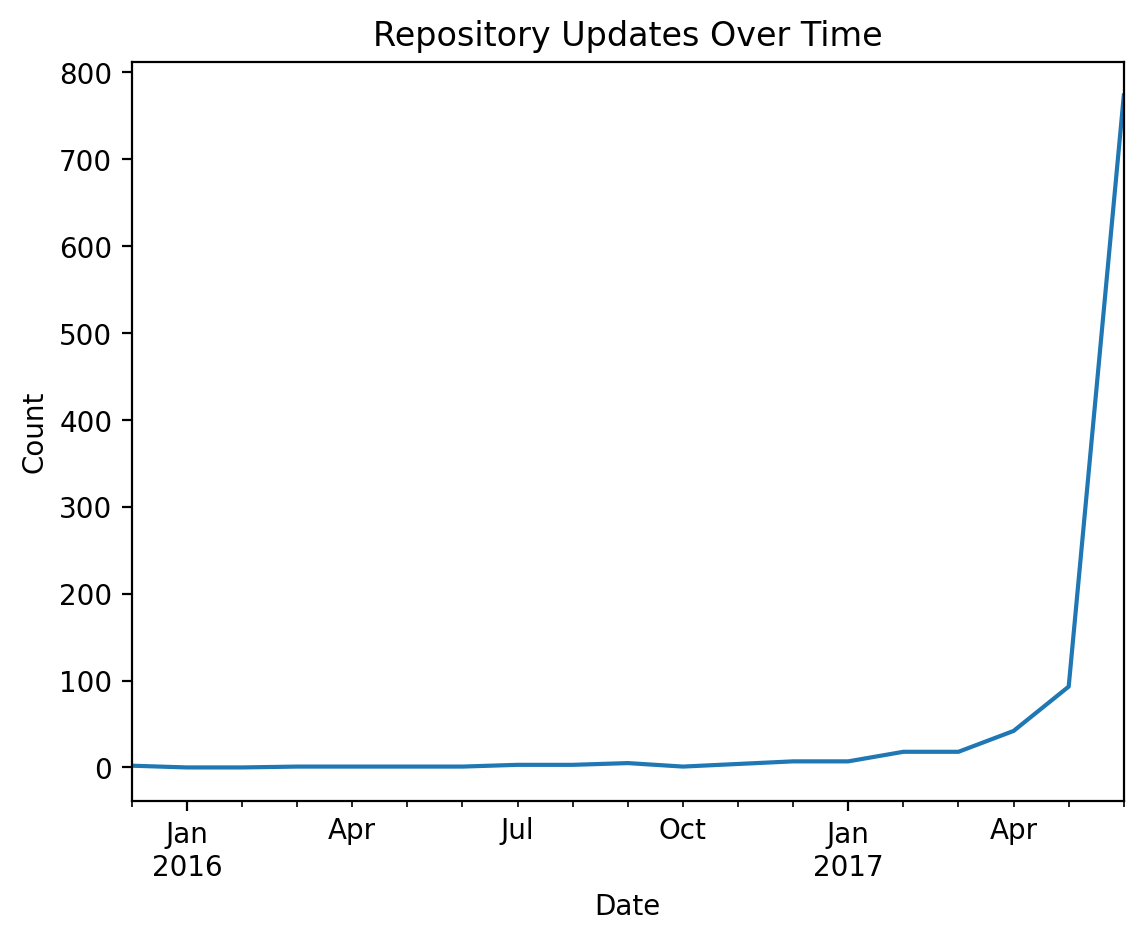

In [14]:
# Time series plot for last update dates
topStared.set_index('Last Update Date').resample('M').size().plot(title='Repository Updates Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show() 